# ISL & PDS Problem 3

## Load Library/Package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import squareform

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


## View Data / Data Exploration / Cleaning & Preprocessing

### View & Load Data / Check Uniqueness of Features / Check Duplicates / Check Null Values




In [3]:
data = pd.read_csv('ApartmentsForRent.csv')
data


id  bathrooms  bedrooms fee pets_allowed   price price_type  \
0      5.668640e+09        1.0       1.0  No         Cats  2195.0    Monthly   
1      5.668640e+09        1.5       3.0  No    Cats,Dogs  1250.0    Monthly   
2      5.668640e+09        2.0       3.0  No          NaN  1395.0    Monthly   
3      5.668640e+09        1.0       2.0  No    Cats,Dogs  1600.0    Monthly   
4      5.668639e+09        1.0       1.0  No    Cats,Dogs   975.0    Monthly   
...             ...        ...       ...  ..          ...     ...        ...   
99487  5.121220e+09        1.0       1.0  No          NaN   780.0    Monthly   
99488  5.121220e+09        2.0       2.0  No    Cats,Dogs   813.0    Monthly   
99489  5.121219e+09        1.0       1.0  No    Cats,Dogs  1325.0    Monthly   
99490  5.121219e+09        1.0       1.0  No    Cats,Dogs   931.0    Monthly   
99491  5.121219e+09        1.5       2.0  No          NaN  1595.0    Monthly   

       square_feet state  latitude  longitude  
0            542.0    CA   33.8520  -118.3759  
1           1500.0    VA   37.0867   -76.4941  
2           1650.0    NC   35.8230   -78.6438  
3            820.0    CA   38.3622  -121.9712  
4            624.0    NM   35.1038  -106.6110  
...            ...   ...       ...        ...  
99487        605.0    TX   29.6151   -95.1998  
99488        921.0    FL   30.2254   -81.7579  
99489        650.0    CA   32.7379  -117.0914  
99490        701.0    NC   35.4158   -80.8451  
99491        900.0    CA   32.7379  -117.0914  

[99492 rows x 11 columns]

In [4]:
data.duplicated().sum()

84

In [5]:
data.isnull().sum()

id                  1
bathrooms          65
bedrooms          127
fee                 2
pets_allowed    60426
price               1
price_type          3
square_feet         1
state             303
latitude           27
longitude          26
dtype: int64

In [6]:
print('fee')
print(data.fee.unique(),'\n')

print('pets_allowed')
print(data.pets_allowed.unique(),'\n')

print('price_type')
print(data.price_type.unique(),'\n')

print('state')
print(data.state.unique(),'\n')

print('bathrooms')
print(data.bathrooms.unique(),'\n')

print('bedrooms')
print(data.bedrooms.unique(),'\n')



fee
['No' nan 'Yes'] 

pets_allowed
['Cats' 'Cats,Dogs' nan 'Dogs' 'Cats,Dogs,None'] 

price_type
['Monthly' nan 'Weekly' 'Monthly|Weekly'] 

state
['CA' 'VA' 'NC' 'NM' 'CO' 'WV' 'GA' 'MA' 'DC' 'AZ' 'IA' 'WA' 'TX' 'IL'
 'MS' 'OR' 'FL' 'MO' 'PA' 'WI' 'OK' 'UT' 'RI' 'NJ' 'IN' 'MD' 'OH' 'TN'
 'ND' 'NE' 'AR' 'MI' 'MN' 'HI' 'ID' 'SC' nan 'KS' 'AL' 'SD' 'NY' 'KY' 'LA'
 'AK' 'CT' 'NV' 'WY' 'VT' 'NH' 'MT' 'DE' 'ME'] 

bathrooms
[  1.    1.5   2.    2.5   3.    3.5   4.    nan   7.    4.5 111.    5.
   8.    8.5   6.    5.5   9.    7.5] 

bedrooms
[ 1.  3.  2.  4.  0.  5. nan  7.  8. 22.  6.  9.] 



### Drop the ID column

In [7]:

# Remove the ID Feature
data.drop(columns=['id'], axis=1, inplace=True)



### Clean Nulls in Latitude, Longitude, & States

In [8]:

# Remove rows where Lat. and Long. both have nulls
data.drop(data[data['latitude'].isnull() & data['longitude'].isnull()].index, axis=0, inplace=True)


# Store the null value indices of states in list
state_null_index = data[data['state'].isna()].index


# View the null values in states features
state_null = data[data['state'].isna()]
print(f'Index of Null Values in state:\n\n{state_null}')


# For each index with a null value in the states feature,
# We round down the the lat & long and make them a coord pair.
# Then compare the rounded down coord pair with the keys in the dictionary.
# If the key value matches with the rounded down coord pair we replace the null
# value in the state feature at that index with the value/string in the dictionary

lat_lon_state = {(35,-78):'NC',
                 (36,-78):'NC',
                 (40,-73):'NY',
                 (28,-82):'FL',
                 (34,-117):'CA',
                 (38,-122):'CA',
                 (37,-92):'MO',
                 (37,-75):'VA',
                 (39,-98):'KS'}

for i in state_null_index:

  lat = math.floor(data['latitude'][i])
  lon = math.ceil(data['longitude'][i])

  if (lat,lon) in lat_lon_state:
    data.loc[i, 'state'] = lat_lon_state[(lat,lon)]



Index of Null Values in state:

       bathrooms  bedrooms fee pets_allowed   price price_type  square_feet  \
5340         1.0       2.0  No          NaN  1880.0    Monthly       1000.0   
5464         1.0       1.0  No    Cats,Dogs  1140.0    Monthly        700.0   
5501         1.5       1.0  No          NaN  1300.0    Monthly        903.0   
5502         1.5       1.0  No    Cats,Dogs  1045.0    Monthly        700.0   
5503         2.5       3.0  No    Cats,Dogs  4999.0    Monthly       2414.0   
...          ...       ...  ..          ...     ...        ...          ...   
79936        1.0       2.0  No          NaN  1500.0    Monthly       1030.0   
79937        2.0       3.0  No          NaN   795.0    Monthly       1420.0   
79938        2.0       2.0  No          NaN  1025.0    Monthly       1118.0   
79940        1.0       2.0  No          NaN  1215.0    Monthly        781.0   
79941        1.0       1.0  No    Cats,Dogs   535.0    Monthly        640.0   

      state  latitu

### Rename & Drop Classes in Pets_Allowed & Fees

In [9]:

# If pets_allowed value is 'Cats,Dogs' or 'Cats,Dogs,None' then change to Both
data.loc[(data['pets_allowed'] == 'Cats,Dogs'), 'pets_allowed'] = 'Both'


# If pets_allowed has null values, then change pets_allowed class to No (no pets allowed)
data.loc[(data['pets_allowed'].isnull(), 'pets_allowed')] = 'No'


# If pets_allowed is No then any null values in fee is changed to 'No'
data.loc[(data['pets_allowed']=='No', 'fee')] = 'No'


# For all classifications of Cats, Dogs, or Both we will have a fee==Yes
data.loc[data['pets_allowed'].isin(['Cats','Dogs','Both']), 'fee'] = 'Yes'


# Drop rows with classification of 'Cats,Dogs,None' in the pets_allowed feature
data.drop(data[data['pets_allowed']=='Cats,Dogs,None'].index, axis=0, inplace=True)



### Drop Rows Not Classified as 'Monthly' in Price_type

In [10]:

# Remove Weekly & Weekly|Monthly classification from price_type feature
# These are only 2 observations
data.drop(data[data['price_type'] != 'Monthly'].index, axis=0, inplace=True)



### Replace Nulls & 0's in Bedrooms & Bathrooms with Mode / Replace Nulls in Price with Average

In [11]:

# Null values in the bathrooms & bedrooms featues will be replaced with the mode of all observations
# We choose mode since there are lots of Nulls and some outliers so averaging may cause problems
bed_mode_val = data.bedrooms.mode()[0]
bath_mode_val = data.bathrooms.mode()[0]

print(f'Mode Value of Bedrooms: {bed_mode_val}')
print(f'Mode Value of Bathrooms: {bath_mode_val}')

data['bedrooms'] = data['bedrooms'].fillna(bed_mode_val)
data['bathrooms'] = data['bathrooms'].fillna(bath_mode_val)


# Null values in the price feature will be replaced with the average of all observations.
price_mean_val = float(math.ceil(data.price.mean()))
print(f'Average Price Value: {price_mean_val}\n')
data['price'] = data['price'].fillna(price_mean_val)


# Replace all rows in the bedroom feature that has 0 bedrooms in them to 1 bedroom
# We choose 1 bedroom since they have 1 bathroom and square footage was small.
data.loc[(data['bedrooms']==0, 'bedrooms')]=1



Mode Value of Bedrooms: 2.0
Mode Value of Bathrooms: 1.0
Average Price Value: 1528.0



### Remove rows if rent is higher than $1700/month

In [12]:
# Collect the indices in the data set that have rent higher that $2000/month
# Then drop these indices from the data set.
# This should help with outliers

j=0
index_drop = []
for i  in data.index:
  if (data['price'][i]) / (data['bedrooms'][i]) > 1700:
    index_drop.append(i)
    j=j+1

data.drop(index=index_drop, inplace=True)

print(f'Deleted {j} rows\n\n')



Deleted 10227 rows




### Remove Outliers

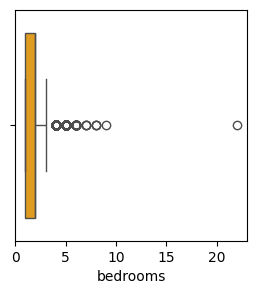

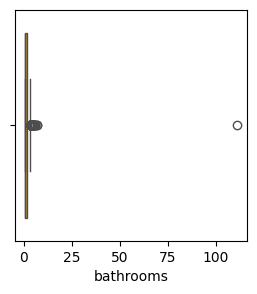

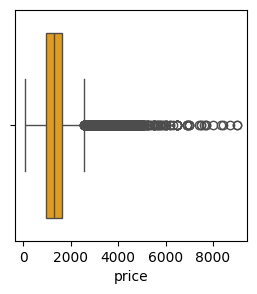

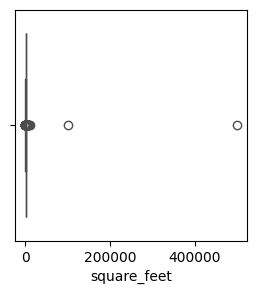

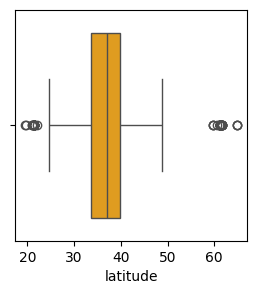

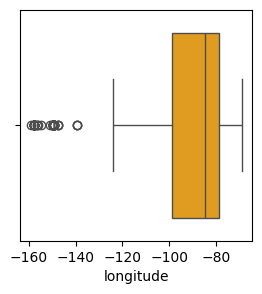

In [13]:

# Check these numerical predictors for outliers
num_data = ['bedrooms','bathrooms','price','square_feet','latitude','longitude']

for i in num_data:
  plt.figure(figsize=(3,3))
  sns.boxplot(data, x=data[i], color='orange')
  plt.show()



In [14]:

# Remove the remaining outliers in square feet, bathrooms, bedrooms, latitude, longitude features

# ---------------------------
#   Square Feet > 7000 sqft
# ---------------------------
data.drop(data[data['square_feet'] >= 7000].index, inplace=True)


# ------------------
#   Bathrooms > 10
# ------------------
data.drop(data[data['bathrooms'] >= 10].index, inplace=True)


# ------------------
#   Bedrooms > 10
# ------------------
data.drop(data[data['bedrooms'] >= 10].index, inplace=True)




In [15]:
data.describe()


bathrooms      bedrooms         price   square_feet      latitude  \
count  89225.000000  89225.000000  89225.000000  89225.000000  89225.000000   
mean       1.473006      1.797691   1390.572765    964.117624     36.866916   
std        0.545498      0.735458    598.192879    353.649852      4.619752   
min        1.000000      1.000000    100.000000    101.000000     19.573800   
25%        1.000000      1.000000    980.000000    736.000000     33.646700   
50%        1.000000      2.000000   1285.000000    925.000000     37.057500   
75%        2.000000      2.000000   1622.000000   1126.000000     39.882800   
max        7.000000      9.000000   9000.000000   6300.000000     64.833200   

          longitude  
count  89225.000000  
mean     -91.126566  
std       15.043606  
min     -159.369800  
25%      -98.525300  
50%      -84.552900  
75%      -78.643800  
max      -68.778800

### Drop Accumulated Duplicates / Check Duplicates & Nulls / Check Labels for Categorical Features


In [16]:
# Check duplicated rows
data.duplicated().sum()


11567

In [17]:
# Drop duplicated data
data.drop_duplicates(inplace=True)


In [18]:
# Check nulls
data.isnull().sum()


bathrooms       0
bedrooms        0
fee             0
pets_allowed    0
price           0
price_type      0
square_feet     0
state           0
latitude        0
longitude       0
dtype: int64

In [19]:
# Check labels for certain features for their labels

print('fee')
print(data.fee.unique(),'\n')

print('pets_allowed')
print(data.pets_allowed.unique(),'\n')

print('price_type')
print(data.price_type.unique(),'\n')

print('state')
print(data.state.unique(),'\n')

print('bathrooms')
print(data.bathrooms.unique(),'\n')

print('bedrooms')
print(data.bedrooms.unique(),'\n')



fee
['Yes' 'No'] 

pets_allowed
['Both' 'No' 'Dogs' 'Cats'] 

price_type
['Monthly'] 

state
['VA' 'NC' 'CA' 'NM' 'CO' 'WV' 'GA' 'MA' 'DC' 'IA' 'WA' 'TX' 'IL' 'MS'
 'OR' 'FL' 'MO' 'PA' 'WI' 'OK' 'UT' 'RI' 'NJ' 'IN' 'MD' 'OH' 'ND' 'NE'
 'AR' 'MI' 'AZ' 'MN' 'ID' 'SC' 'KS' 'TN' 'AL' 'SD' 'NY' 'KY' 'LA' 'AK'
 'CT' 'NV' 'HI' 'WY' 'VT' 'NH' 'MT' 'DE' 'ME'] 

bathrooms
[1.5 2.  1.  2.5 3.  4.  3.5 7.  4.5 5.  5.5 6. ] 

bedrooms
[3. 2. 1. 5. 4. 7. 8. 6. 9.] 



## Data Exploration

#### Scatter Plots

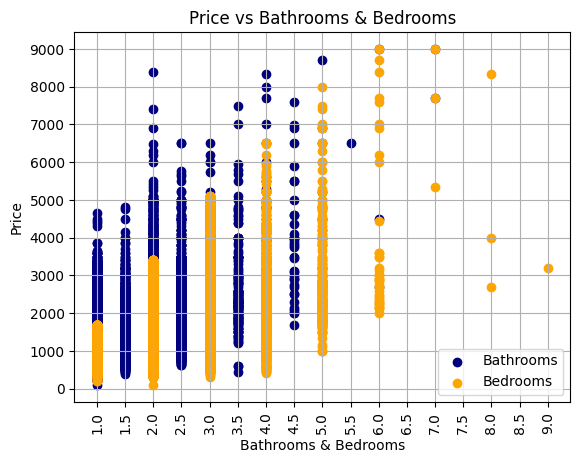

In [20]:
# Plot bathroom and bedroom vs price

plt.scatter(x=data['bathrooms'], y=data['price'], color='navy', label='Bathrooms')
plt.scatter(x=data['bedrooms'], y=data['price'], color='orange', label='Bedrooms')

plt.ylabel(f'Price')
plt.xlabel(f'Bathrooms & Bedrooms')
plt.title(f'Price vs Bathrooms & Bedrooms')

plt.xticks(np.arange(1, 9.5 ,0.5), rotation=90)
plt.yticks(np.arange(0, 10000, 1000))

plt.legend()
plt.grid(True)
plt.show()


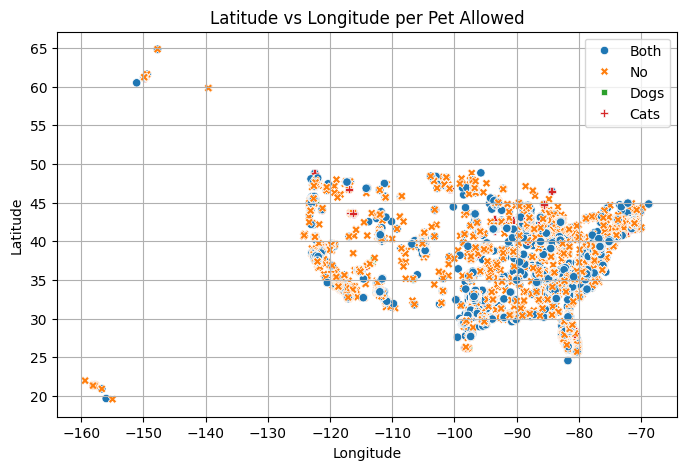

In [21]:
# Scatterplot of Price vs Latitude & Longitude

plt.figure(figsize=(8,5))
sns.scatterplot(x=data['longitude'], y=data['latitude'], hue=data['pets_allowed'], style=data['pets_allowed'])

plt.title(f'Latitude vs Longitude per Pet Allowed')
plt.xlabel(f'Longitude')
plt.ylabel(f'Latitude')

plt.xticks(np.arange(-160, -60, 10))
plt.yticks(np.arange(20, 70, 5))

plt.legend()
plt.grid(True)
plt.show()



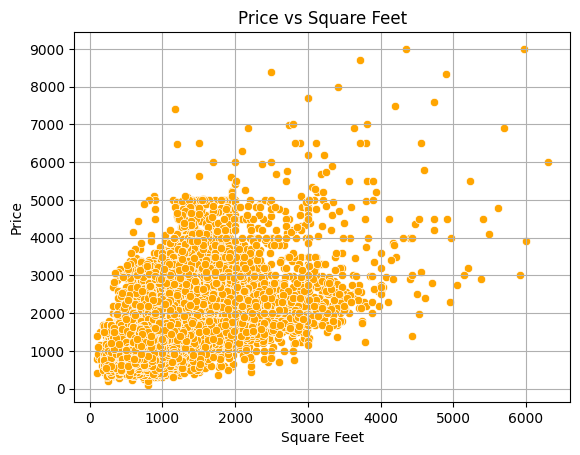

In [22]:
# Scatterplot of Price vs square footage
sns.scatterplot(x=data['square_feet'], y=data['price'], color='orange')

plt.ylabel(f'Price')
plt.xlabel(f'Square Feet')
plt.title(f'Price vs Square Feet')

plt.yticks(np.arange(0, 10000, 1000))

plt.grid(True)
plt.show()


#### Histograms

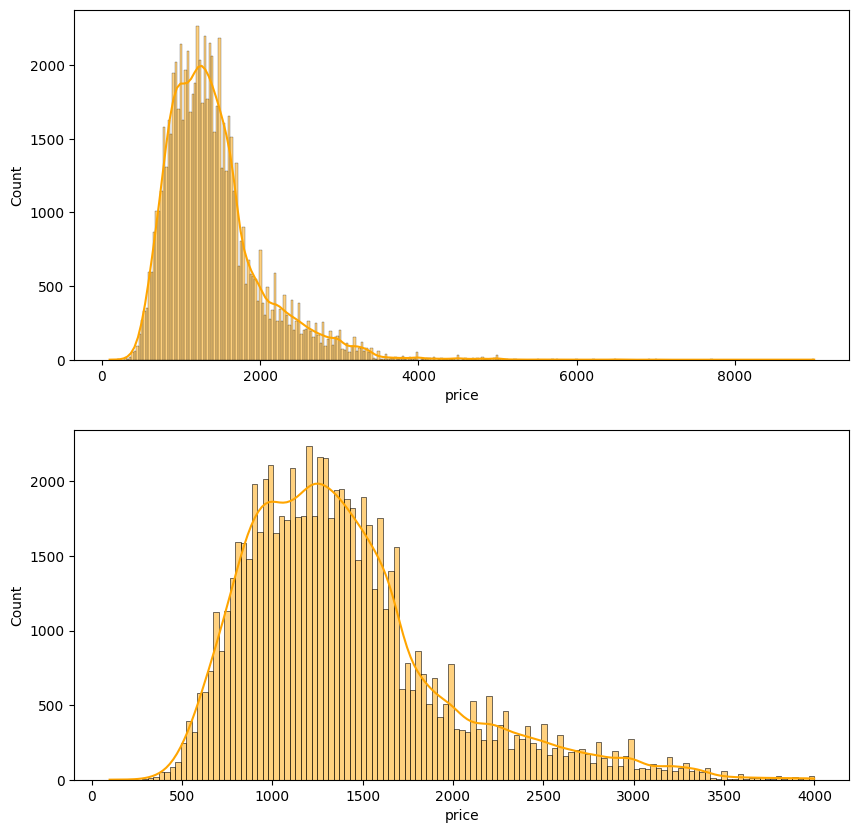

In [23]:
# Make a histogram showing distribution of price feature
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.histplot(data=data, x=data['price'], color='orange', kde=True)

plt.subplot(2,1,2)
sns.histplot(data=data[data['price'] < 4000], x='price', color='orange', kde=True)

plt.show()


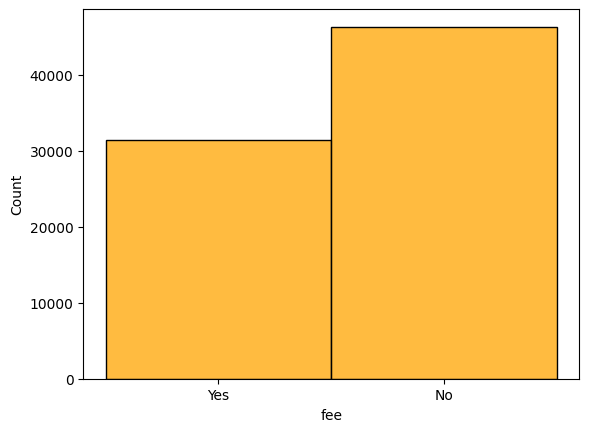

In [24]:
# Histogram for each class in the fee feature
sns.histplot(data=data, x=data['fee'], color='orange');


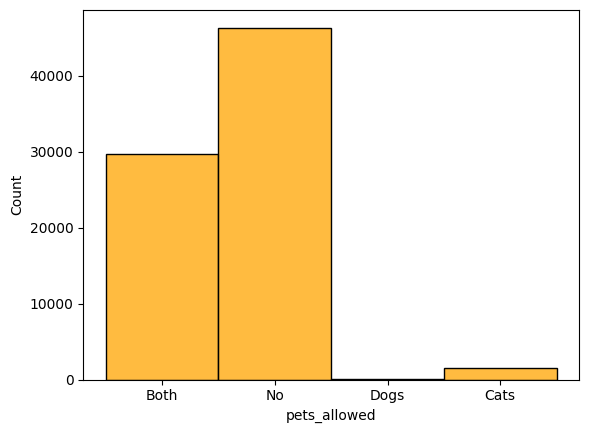

In [25]:
# Histogram for each class in pets_allowed feature
sns.histplot(data=data, x=data['pets_allowed'], color='orange');


#### Boxplots

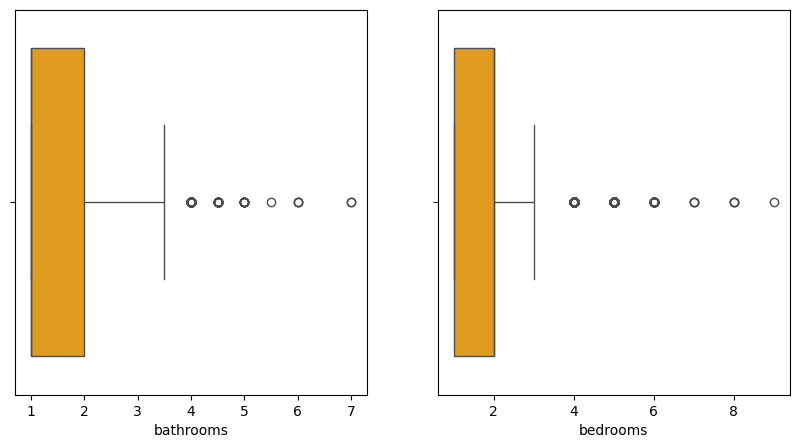

In [26]:
# Box plot of bathrooms and bedrooms
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(data=data, x=data['bathrooms'], color='orange')

plt.subplot(1,2,2)
sns.boxplot(data=data, x=data['bedrooms'], color='orange')

plt.show()


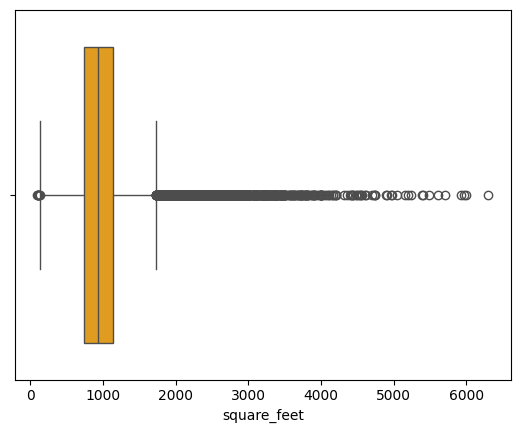

In [27]:
# Box plot of square feet feature
sns.boxplot(data=data, x=data['square_feet'], color='orange');


#### Correlation Matrix

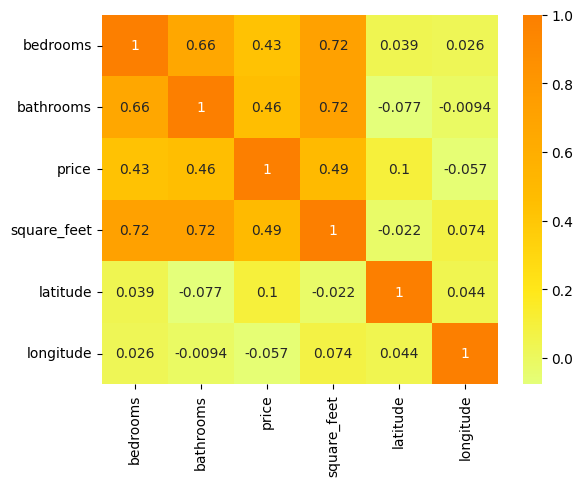

In [28]:
# Make a correlation matrix of the numerical features

num_pred = data[['bedrooms','bathrooms','price','square_feet','latitude','longitude']]

sns.heatmap(data=num_pred.corr(), cmap='Wistia', annot=True)
plt.show()



In [29]:
data

bathrooms  bedrooms  fee pets_allowed   price price_type  square_feet  \
1            1.5       3.0  Yes         Both  1250.0    Monthly       1500.0   
2            2.0       3.0   No           No  1395.0    Monthly       1650.0   
3            1.0       2.0  Yes         Both  1600.0    Monthly        820.0   
4            1.0       1.0  Yes         Both   975.0    Monthly        624.0   
5            1.5       2.0  Yes         Both  1250.0    Monthly        965.0   
...          ...       ...  ...          ...     ...        ...          ...   
99486        1.0       1.0  Yes         Both   798.0    Monthly        650.0   
99487        1.0       1.0   No           No   780.0    Monthly        605.0   
99489        1.0       1.0  Yes         Both  1325.0    Monthly        650.0   
99490        1.0       1.0  Yes         Both   931.0    Monthly        701.0   
99491        1.5       2.0   No           No  1595.0    Monthly        900.0   

      state  latitude  longitude  
1        VA   37.0867   -76.4941  
2        NC   35.8230   -78.6438  
3        CA   38.3622  -121.9712  
4        NM   35.1038  -106.6110  
5        NM   35.1038  -106.6110  
...     ...       ...        ...  
99486    FL   30.2254   -81.7579  
99487    TX   29.6151   -95.1998  
99489    CA   32.7379  -117.0914  
99490    NC   35.4158   -80.8451  
99491    CA   32.7379  -117.0914  

[77658 rows x 10 columns]

## Assign, Scale, & Sample X & Y
##### x_nums / x_dummies / sample_nums / sample_dummies

In [20]:
#     We want two different data sets:
#       *   With categorical data removed (x_nums from data)
#       *   With one hot encoding (x_dummies from data_dummies)

# Reminder: We are using only predictors, x, so there is no y involved

numerical = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude']
categorical = ['fee', 'pets_allowed', 'price_type', 'state']


# Use this to scale the data
scaler = StandardScaler()



              # CATEGORICAL PREDICTORS REMOVED - ONLY NUMERICAL PREDICTORS

data[numerical] = scaler.fit_transform(data[numerical])
x_nums = pd.DataFrame(data[numerical])
x_nums_train, x_nums_test = train_test_split(x_nums, test_size=0.2, random_state=8)

# Take a sample of 500 indices (rows) of the test data
index_sample_nums = np.random.choice(x_nums_test.shape[0], size=500, replace=False)

# For each random index (row) in test dataset
# We assign sample with those 500 rows
sample_nums = x_nums_test.iloc[index_sample_nums]

# All 100 rows in sample will become its own dataset
sample_nums = pd.DataFrame(sample_nums)





              # ONE HOT ENCODING - DUMMY VARIABLES

x_dummies = pd.get_dummies(data[categorical], drop_first=True, dtype=int)
x_dummies = pd.concat([data[numerical], x_dummies], axis=1)
x_dummies_train, x_dummies_test = train_test_split(x_dummies, test_size=0.2, random_state=8)

# Take a sample of 500 indices (rows) of the test data
index_sample_dummies = np.random.choice(x_dummies_test.shape[0], size=500, replace=False)

# For each random index (row) in test dataset
# We assign sample with those 500 rows
sample_dummies = x_dummies_test.iloc[index_sample_dummies]

# All 300 rows in sample will become its own dataset
sample_dummies = pd.DataFrame(sample_dummies)



## K-Means Clustering

### Numerical Features Only (x_nums & sample_nums)

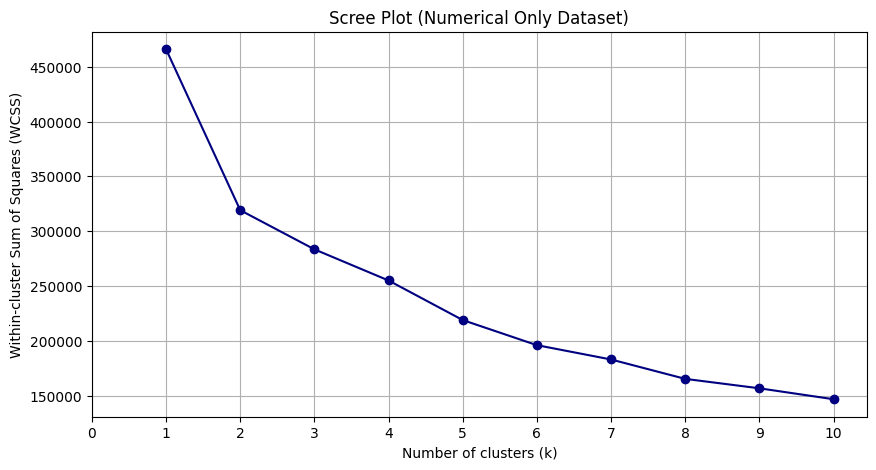

In [71]:
# Creating a Scree Plot to Find Best Number of Clusters
# We use the elbow method

WCSS = []
k = [1,2,3,4,5,6,7,8,9,10]
for i in k:
  km = KMeans(n_clusters=i)
  km = km.fit(x_nums)
  WCSS.append(km.inertia_)

# plot the WCSS for each cluster
ax = plt.figure(figsize=(10,5)).gca()
plt.plot(k, WCSS, 'o-', color='navy')

plt.title(f'Scree Plot (Numerical Only Dataset)')

plt.xticks(np.arange(0,11,1))
plt.xlabel('Number of clusters (k)')

plt.ylabel('Within-cluster Sum of Squares (WCSS)')

plt.grid()
plt.show()



In [32]:
# Figure out what cluster size is best with silhoutte scores

cluster_size = [2,3,4,5,6]

for i in cluster_size:
  # Assign KMean class
  km_nums = KMeans(n_clusters = i)

  # Fit and Train with training data
  # Get training model silhouette score
  km_nums = km_nums.fit(x_nums_train)

  # Predict clusters with train and test data
  # Get test model silhouette score
  train_clusters = km_nums.fit_predict(x_nums_train)
  test_clusters = km_nums.fit_predict(x_nums_test)

  # Find silhouette score for train and test
  x_nums_train_score = silhouette_score(x_nums_train, train_clusters)
  x_nums_test_score = silhouette_score(x_nums_test, test_clusters)

  # Print the train and test silhouette scores
  print(f'Cluster Size {i}')
  print(f'Train Silhouette Score: {x_nums_train_score:.3f}')
  print(f'Test Silhouette Score: {x_nums_test_score:.3f}\n\n')



Cluster Size 2
Train Silhouette Score: 0.309
Test Silhouette Score: 0.307


Cluster Size 3
Train Silhouette Score: 0.215
Test Silhouette Score: 0.295


Cluster Size 4
Train Silhouette Score: 0.229
Test Silhouette Score: 0.228


Cluster Size 5
Train Silhouette Score: 0.246
Test Silhouette Score: 0.246


Cluster Size 6
Train Silhouette Score: 0.237
Test Silhouette Score: 0.239




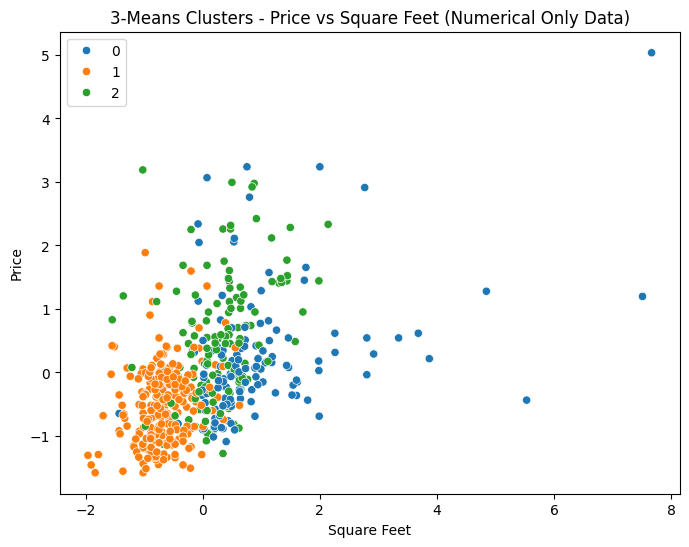

In [63]:

# --------------------------------
#  Visualize K-Means Clustering
#      Numerical Variables
# --------------------------------

k_view = KMeans(n_clusters=3)
k_view.fit(x_nums_train)
sampled_clusters = k_view.fit_predict(sample_nums)

# Visualize the data (Price vs Square Feet)
plt.figure(figsize=(8, 6))
sns.scatterplot(data = sample_nums, y='price', x='square_feet',
                hue = sampled_clusters, palette='tab10')

plt.title(f'3-Means Clusters - Price vs Square Feet (Numerical Only Data)')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()



### Dummy Variables (x_dummies & sample_dummies)

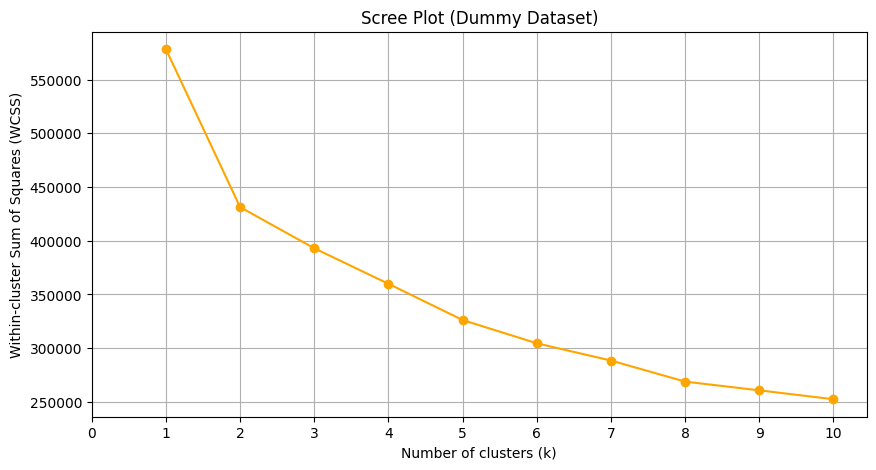

In [34]:
# Creating a Scree Plot to Find Best Number of Clusters
# We use the elbow method

WCSS = []
k = [1,2,3,4,5,6,7,8,9,10]
for i in k:
  km = KMeans(n_clusters=i)
  km = km.fit(x_dummies)
  WCSS.append(km.inertia_)

# plot the WCSS for each cluster
ax = plt.figure(figsize=(10,5)).gca()
plt.plot(k, WCSS, 'o-', color='orange')

plt.title(f'Scree Plot (Dummy Dataset)')

plt.xticks(np.arange(0,11,1))
plt.xlabel('Number of clusters (k)')

plt.ylabel('Within-cluster Sum of Squares (WCSS)')

plt.grid()
plt.show()



In [35]:
# Figure out what cluster size is best with silhoutte scores

cluster_size = [2,3,4,5,6]

for i in cluster_size:
  # Assign KMean class
  km_dum = KMeans(n_clusters = i)

  # Fit and Train with training data
  # Get training model silhouette score
  km_dum = km_dum.fit(x_dummies_train)

  # Predict clusters with train and test data
  # Get test model silhouette score
  train_clusters = km_dum.fit_predict(x_dummies_train)
  test_clusters = km_dum.fit_predict(x_dummies_test)

  # Find silhouette score for train and test
  x_dummies_train_score = silhouette_score(x_dummies_train, train_clusters)
  x_dummies_test_score = silhouette_score(x_dummies_test, test_clusters)

  # Print the train and test silhouette scores
  print(f'Cluster Size {i}')
  print(f'Train Silhouette Score: {x_dummies_train_score:.3f}')
  print(f'Test Silhouette Score: {x_dummies_test_score:.3f}\n\n')



Cluster Size 2
Train Silhouette Score: 0.238
Test Silhouette Score: 0.237


Cluster Size 3
Train Silhouette Score: 0.196
Test Silhouette Score: 0.225


Cluster Size 4
Train Silhouette Score: 0.160
Test Silhouette Score: 0.186


Cluster Size 5
Train Silhouette Score: 0.179
Test Silhouette Score: 0.176


Cluster Size 6
Train Silhouette Score: 0.173
Test Silhouette Score: 0.170




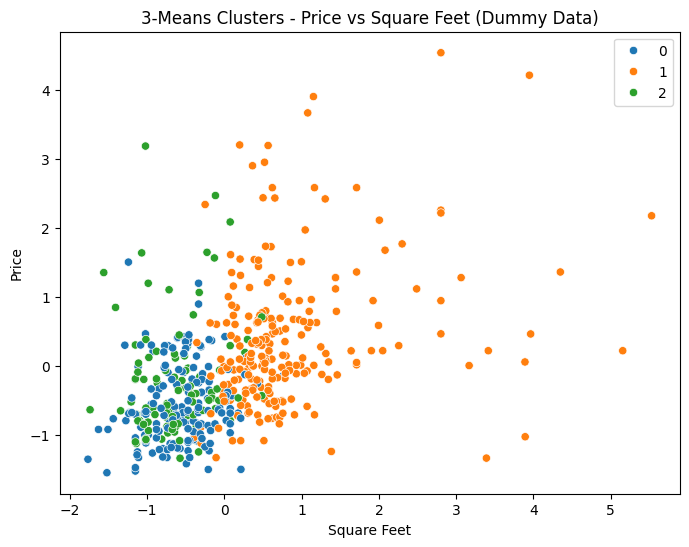

In [41]:

# --------------------------------
#  Visualize K-Means Clustering
#        Dummy Variables
# --------------------------------

k_view = KMeans(n_clusters=3)
k_view.fit(x_dummies_train)
sampled_clusters = k_view.fit_predict(sample_dummies)

# Visualize the data (price vs square feet)
plt.figure(figsize=(8, 6))
sns.scatterplot(data = sample_dummies, y='price', x='square_feet',
                hue = sampled_clusters, palette='tab10')

plt.title(f'3-Means Clusters - Price vs Square Feet (Dummy Data)')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()



## Hierarchical Clustering

### Numerical Features Only (x_nums & sample_nums)

In [37]:
# Silhouette Score for Numerical Features per Method

cluster_size = [2,3,4,5,6,7,8,9,10]
methods = ['single','complete','average','ward']
sil_scores = [ [], [], [], [] ]

color = ['ro-', 'bo-', 'go-', 'yo-']
label = ['single', 'complete', 'average', 'yellow']

for i in range(len(methods)):
  for v in cluster_size:
    agg_dummies = AgglomerativeClustering(n_clusters=v, linkage=methods[i])
    agg_dummies_predict = agg_dummies.fit_predict(sample_nums)

    ss = silhouette_score(sample_nums, agg_dummies_predict)
    sil_scores[i].append(ss)



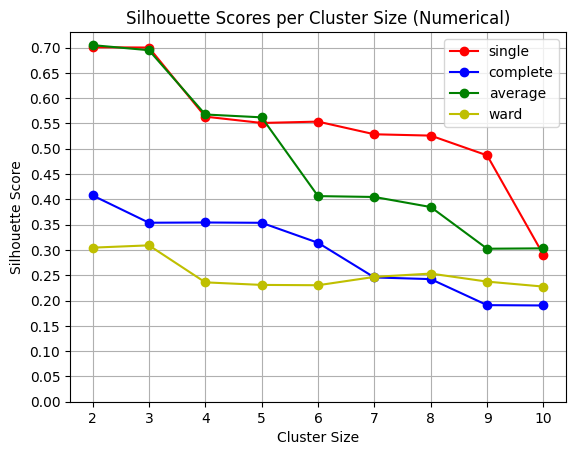

In [38]:
color = ['ro-', 'bo-', 'go-', 'yo-']
label = ['single', 'complete', 'average', 'ward']
cluster_size = [2,3,4,5,6,7,8,9,10]

for i in range(4):
  plt.plot(cluster_size, sil_scores[i], color[i], label=label[i])

plt.title(f'Silhouette Scores per Cluster Size (Numerical)')
plt.xlabel(f'Cluster Size')
plt.ylabel(f'Silhouette Score')

plt.xticks(np.arange(2,11,1))
plt.yticks(np.arange(0, 0.75, 0.05))

plt.grid(True)
plt.legend()
plt.show()


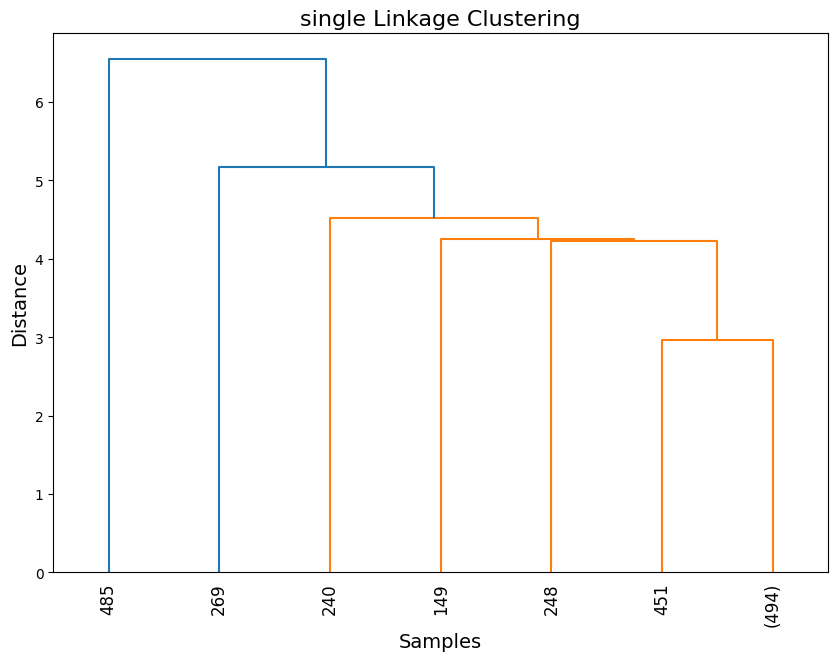

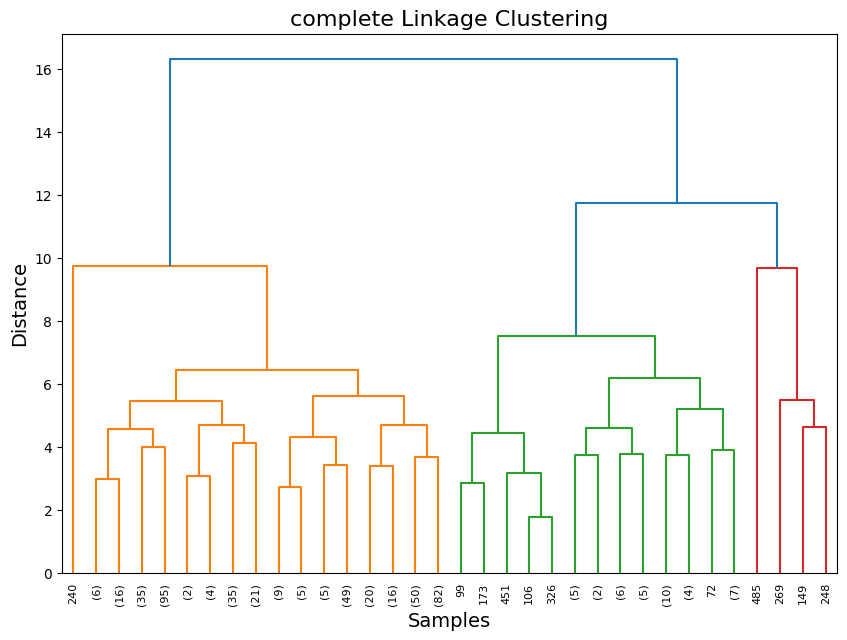

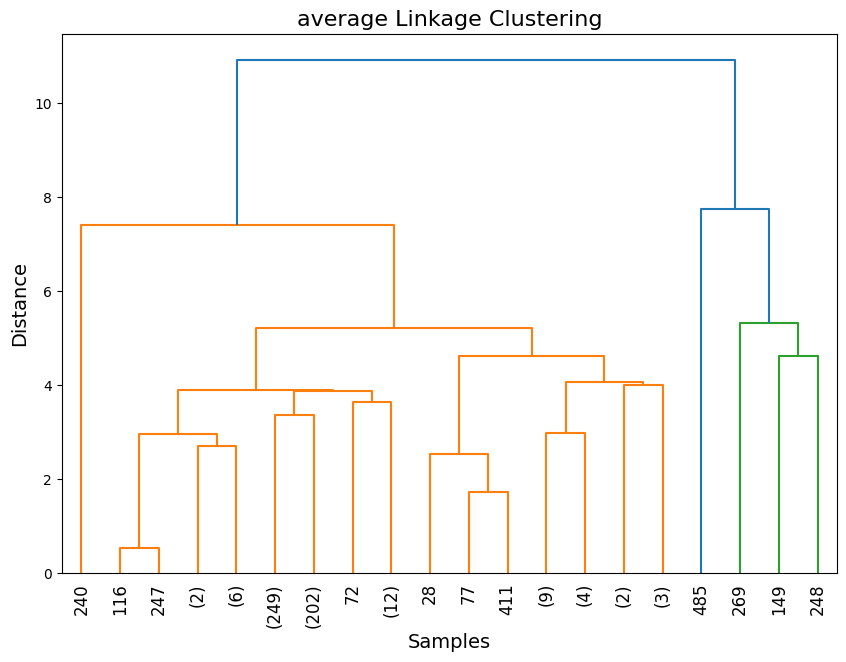

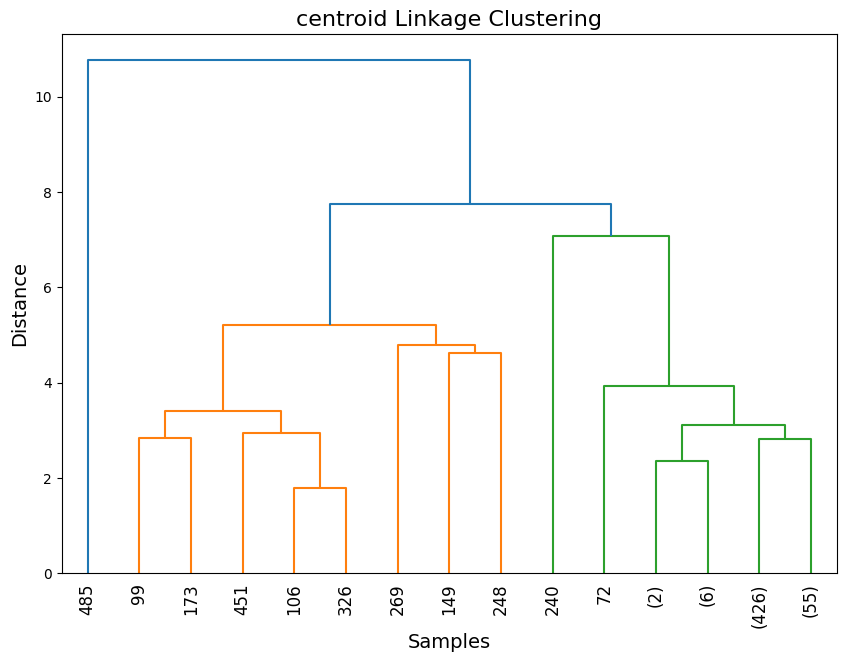

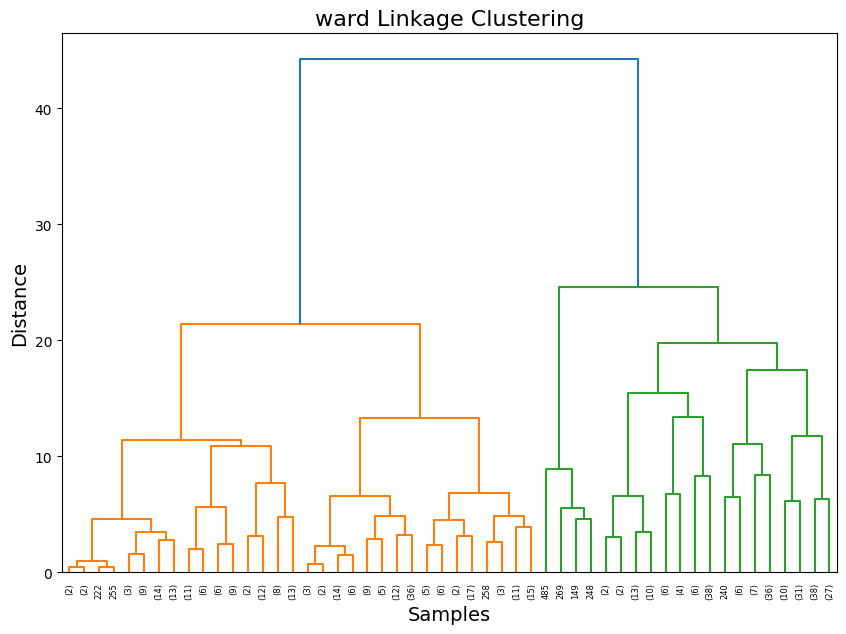

In [39]:

# ------------------------------------
#  Visualize Hierarchical Clustering
#        Numerical Variables
# ------------------------------------


linkage_methods = ['single','complete','average','centroid','ward']

for method in linkage_methods:
    # Define a clustering model with single linkage
    # Sample for 300 clusters
    linkage_cluster = linkage(sample_nums, method=method)

    # Create the dendrogram
    # Only 5 levels
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_cluster, truncate_mode='level', p=5, leaf_rotation=90);

    #Plot the dendrgram
    plt.ylabel(f'Distance', fontsize=14)

    plt.xlabel('Samples', fontsize=14)

    plt.title(f'{method} Linkage Clustering', fontsize=16)
    plt.show()




### Dummy Variables (x_dummies & sample_dummies)

In [40]:
# Silhouette Score for Dummy Dataset per Method

cluster_size = [2,3,4,5,6,7,8,9,10]
methods = ['single','complete','average','ward']
sil_scores = [ [], [], [], [] ]

color = ['ro-', 'bo-', 'go-', 'yo-']
label = ['single', 'complete', 'average', 'yellow']

for i in range(len(methods)):
  for v in cluster_size:
    agg_dummies = AgglomerativeClustering(n_clusters=v, linkage=methods[i])
    agg_dummies_predict = agg_dummies.fit_predict(sample_dummies)

    ss = silhouette_score(sample_dummies, agg_dummies_predict)

    sil_scores[i].append(ss)



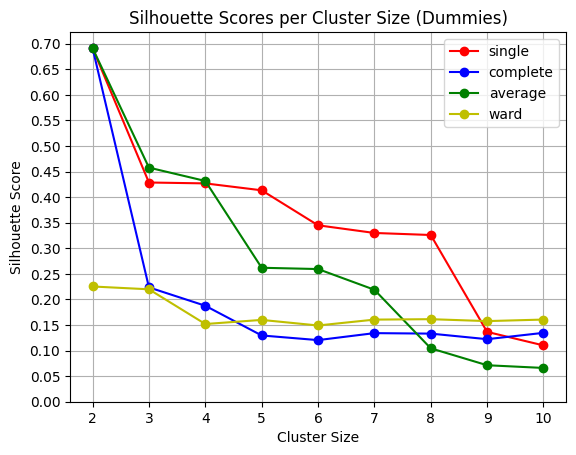

In [41]:
color = ['ro-', 'bo-', 'go-', 'yo-']
label = ['single', 'complete', 'average', 'ward']
cluster_size = [2,3,4,5,6,7,8,9,10]

for i in range(4):
  plt.plot(cluster_size, sil_scores[i], color[i], label=label[i])

plt.title(f'Silhouette Scores per Cluster Size (Dummies)')
plt.xlabel(f'Cluster Size')
plt.ylabel(f'Silhouette Score')

plt.xticks(np.arange(2,11,1))
plt.yticks(np.arange(0, 0.75, 0.05))

plt.grid(True)
plt.legend()
plt.show()



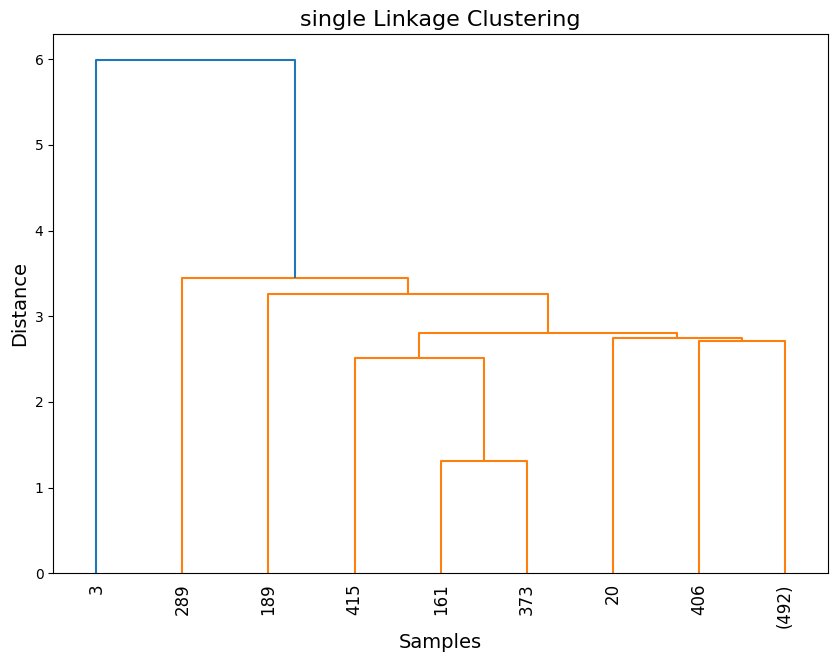

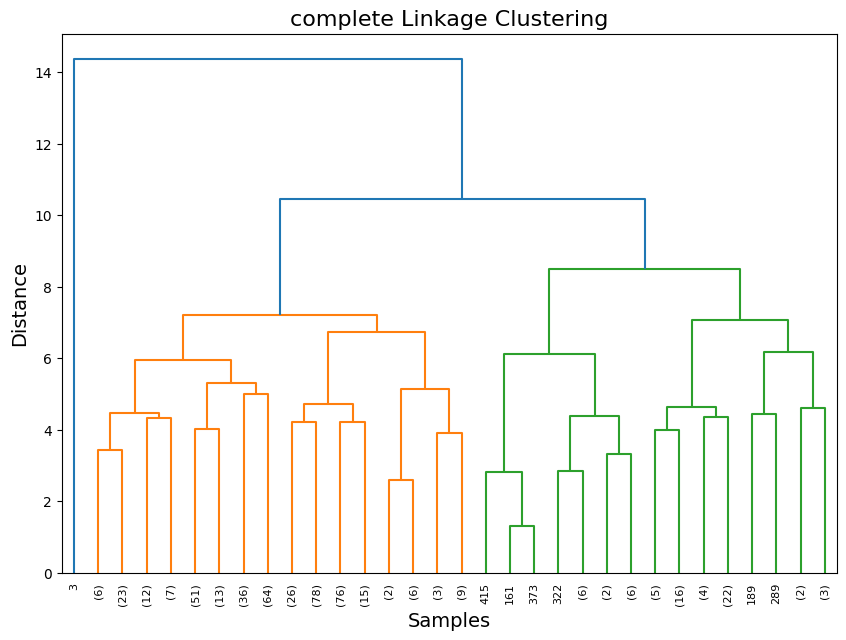

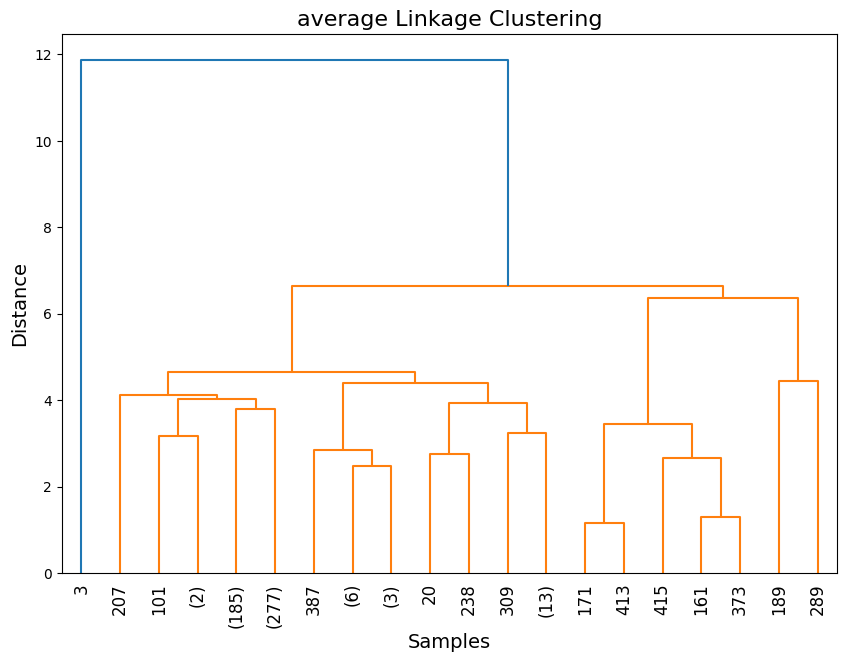

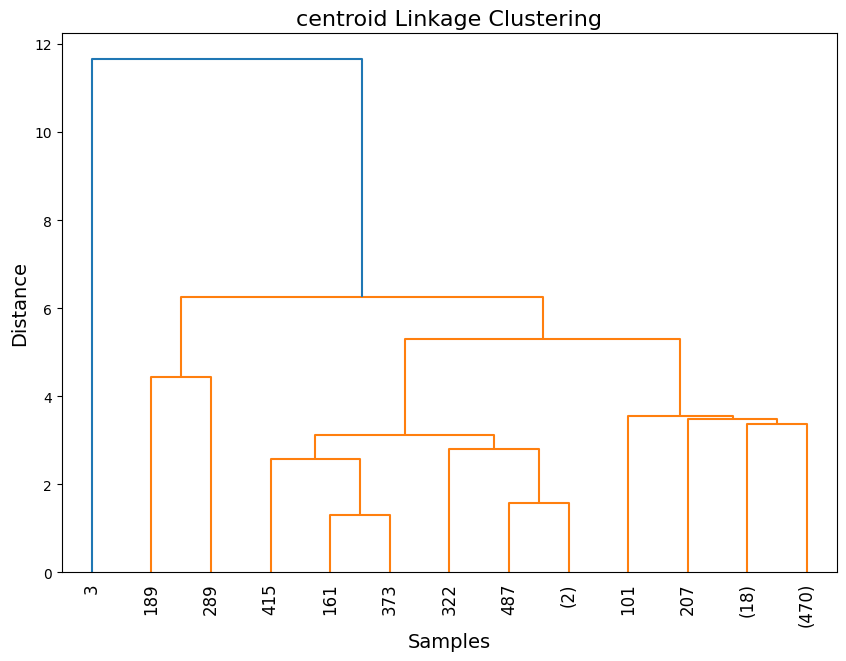

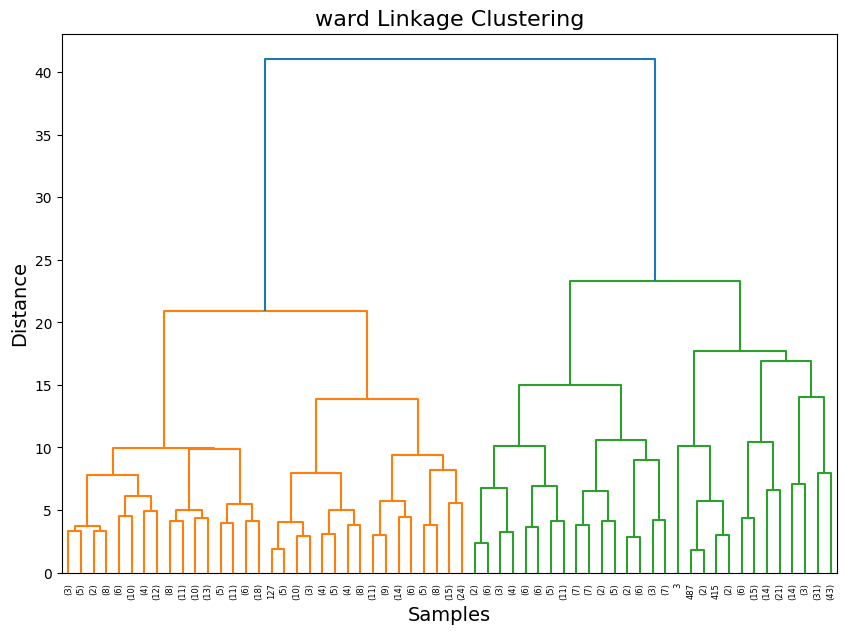

In [42]:

# ------------------------------------
#  Visualize Hierarchical Clustering
#         Dummy Variables
# ------------------------------------


linkage_methods = ['single','complete','average','centroid','ward']

for method in linkage_methods:
    # Define a clustering model with single linkage
    # Sample for 300 clusters
    linkage_cluster = linkage(sample_dummies, method=method)

    # Create the dendrogram
    # Only 5 levels
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_cluster, truncate_mode='level', p=5, leaf_rotation=90);

    #Plot the dendrgram
    plt.ylabel(f'Distance', fontsize=14)

    plt.xlabel('Samples', fontsize=14)

    plt.title(f'{method} Linkage Clustering', fontsize=16)
    plt.show()



## PCA (x_nums dataset)

In [73]:

# Get the correlation matrix of the dummy variables
plt.figure(figsize=(100,100))
sns.heatmap(x_dummies.corr(), annot=True, cmap='coolwarm');


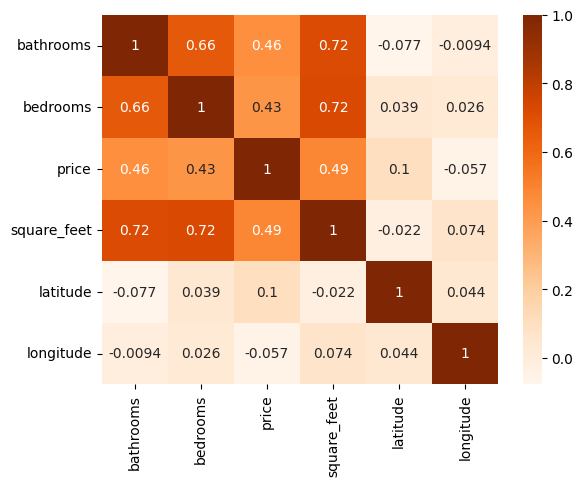

In [74]:

# Correlation Matrix
sns.heatmap(x_nums.corr(), annot=True, cmap='Oranges');


In [75]:
# ---------------------------
#   Perform PCA with x_nums
# ---------------------------

# Create and fit PCA model with x_nums
# Number of components is number of predictors or observations which ever is lowest
pca_model = PCA(n_components=6)
pca_model.fit(x_nums)

# Eigen vectors
eigen_vectors = pca_model.transform(x_nums)
print(f'Eigen Vectors')
print(eigen_vectors)

# Explained variance by each component (eigen values)
print(f'\n\nExplained variance by each component / Eigen Values')
print(pca_model.explained_variance_)

# Percentage of variance explained by each component
print(f'\n\nPercent of variance explained by each component')
print(pca_model.explained_variance_ratio_)



Eigen Vectors
[[ 1.52244325  0.62009683  1.01601655 -0.82513579 -1.00042639  0.42781624]
 [ 2.31012634  0.22775376  1.0870761  -0.80737671 -0.39725689  0.42496703]
 [-0.45086603 -0.78862122 -1.96829131 -0.09548997 -0.82764968  0.00480341]
 ...
 [-1.57970241 -1.65048471 -1.03281087  0.41213579 -0.05861436  0.17941392]
 [-1.73080117  0.14867226  0.75039596  0.16976304  0.12067614  0.16974126]
 [ 0.13447761 -1.6838852  -0.98346501  0.06486124 -0.31168117 -0.19583507]]


Explained variance by each component / Eigen Values
[2.75973342 1.05578185 1.00172954 0.60371725 0.32577156 0.25334364]


Percent of variance explained by each component
[0.45994965 0.17596138 0.16695277 0.10061825 0.05429456 0.0422234 ]


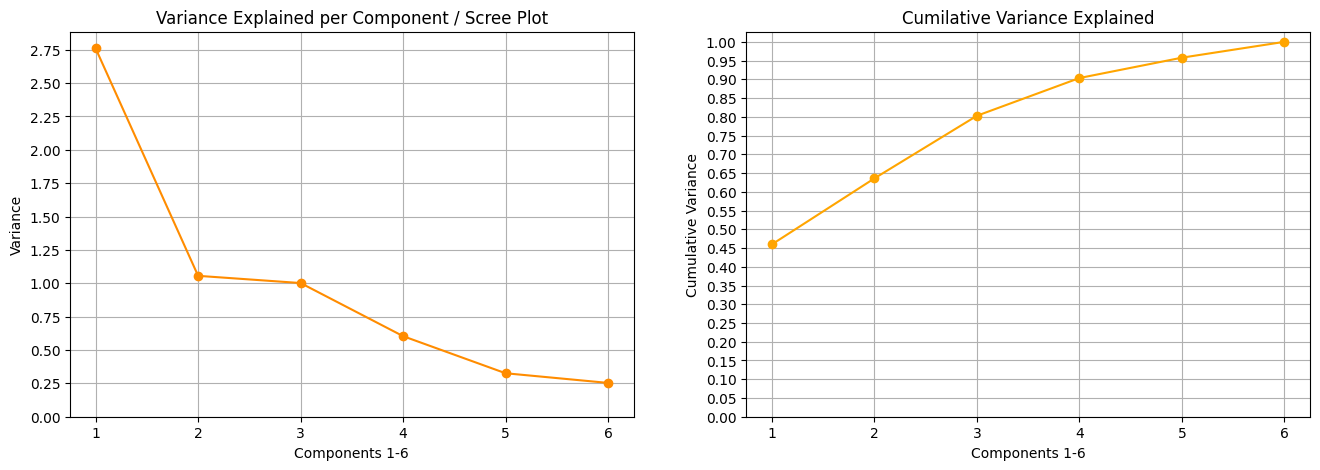

In [76]:

plt.figure(figsize=(16,5))

# Visualize Explained Variance / Scree Plot
plt.subplot(1,2,1)
plt.plot([1,2,3,4,5,6], pca_model.explained_variance_, 'o-', color='darkorange')

plt.title(f'Variance Explained per Component / Scree Plot')
plt.xlabel(f'Components 1-6')
plt.ylabel(f'Variance')
plt.yticks(np.arange(0, 3, 0.25))
plt.grid(True)



# Visualize the cumulative variance explained
plt.subplot(1,2,2)
cum_variance = np.cumsum(pca_model.explained_variance_ratio_)

plt.plot([1,2,3,4,5,6], cum_variance, 'o-', color='orange')
plt.title(f'Cumilative Variance Explained')
plt.xlabel(f'Components 1-6')
plt.ylabel(f'Cumulative Variance')
plt.yticks(np.arange(0, 1.05, 0.05))
plt.grid(True)


plt.show()


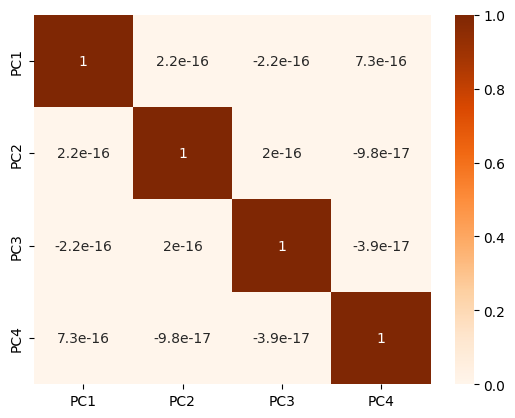

In [77]:
# -------------------------------
#   View the Correlation Matrix
#         of Components
# -------------------------------

# From the eigen vectors we select the entire rows but only columns 0,1,2,3
# these are the first four components that explain the variance columns.
eigen_vectors = eigen_vectors[:, [0,1,2,3]]

# We label and make them their own dataset.
eigen_vectors = pd.DataFrame(eigen_vectors, columns=['PC1','PC2','PC3','PC4'])

# To ensure that PC 1, 2, 3, 4 are different we make a confusion matrix
sns.heatmap(eigen_vectors.corr(), annot=True, cmap='Oranges');



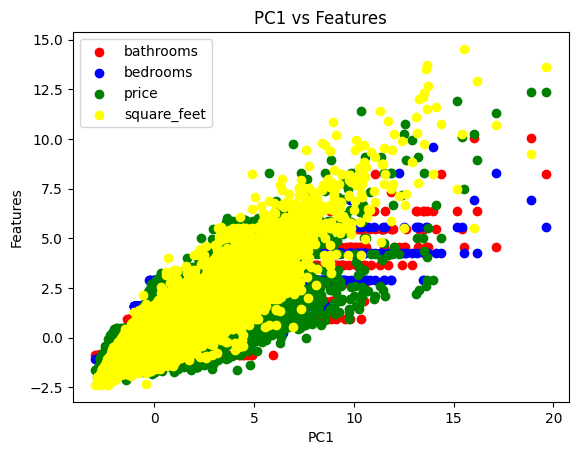

In [78]:

# Find what variables are associated with the PC1

plt.scatter(x=eigen_vectors['PC1'], y=x_nums['bathrooms'], color='red', label='bathrooms')

plt.scatter(x=eigen_vectors['PC1'], y=x_nums['bedrooms'], color='blue', label='bedrooms')

plt.scatter(x=eigen_vectors['PC1'], y=x_nums['price'], color='green', label='price')

plt.scatter(x=eigen_vectors['PC1'], y=x_nums['square_feet'], color='yellow', label='square_feet')

plt.title(f'PC1 vs Features')
plt.xlabel(f'PC1')
plt.ylabel(f'Features')

plt.legend()
plt.show()



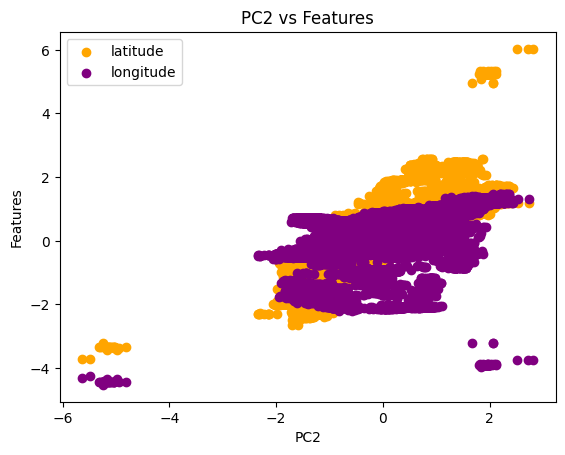

In [79]:

# Find what variables are associated with the PC2

plt.scatter(x=eigen_vectors['PC2'], y=x_nums['latitude'], color='orange', label='latitude')

plt.scatter(x=eigen_vectors['PC2'], y=x_nums['longitude'], color='purple', label='longitude')

plt.title(f'PC2 vs Features')
plt.xlabel(f'PC2')
plt.ylabel(f'Features')

plt.legend()
plt.show()


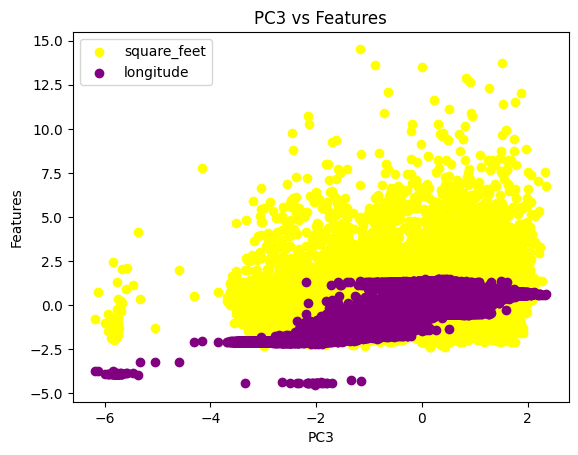

In [80]:

# Find what variables are associated with the PC3

plt.scatter(x=eigen_vectors['PC3'], y=x_nums['square_feet'], color='yellow', label='square_feet')

plt.scatter(x=eigen_vectors['PC3'], y=x_nums['longitude'], color='purple', label='longitude')

plt.title(f'PC3 vs Features')
plt.xlabel(f'PC3')
plt.ylabel(f'Features')

plt.legend()
plt.show()


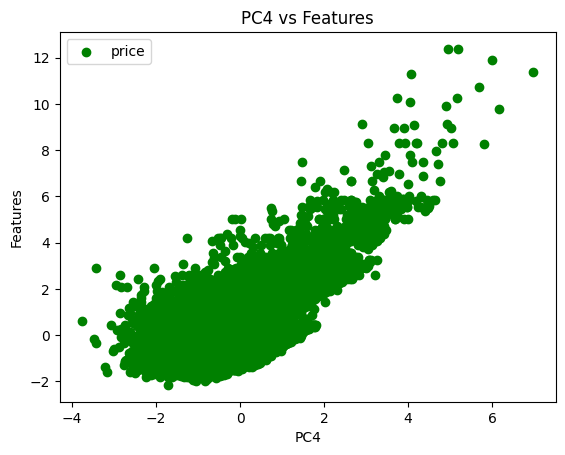

In [81]:

# Find what variables are associated with the PC4

plt.scatter(x=eigen_vectors['PC4'], y=x_nums['price'], color='green', label='price')


plt.title(f'PC4 vs Features')
plt.xlabel(f'PC4')
plt.ylabel(f'Features')

plt.legend()
plt.show()


## Retrain Models with PCA

### Assign & Sample X&Y

In [82]:
# Train test split the eigen vectors
pca_train, pca_test = train_test_split(eigen_vectors, test_size=0.2, random_state=8)

# Choose 300 random indices within pca_test
pca_index = np.random.choice(pca_test.shape[0], size=300, replace=False)

# After we choose 300 random indices, then we get their rows within pca_test
pca_sample = pca_test.iloc[pca_index]

# Make pca_sample into a Data Frame
pca_sample = pd.DataFrame(pca_sample)


### K-Means (PCA Dataset)

In [53]:
# Calculate the silhouette scores of different cluster sizes
cluster_size = [2,3,4,5,6,7,8,9,10]
ss = []

for i in cluster_size:
  # Assign KMean class
  km = KMeans(n_clusters = i)

  # Fit and Train with training data
  # Get training model silhouette score
  km = km.fit(pca_train)

  # Predict clusters with test data
  test_clusters = km.predict(pca_test)

  # Find silhouette score for train and test
  test_ss = silhouette_score(pca_test, test_clusters)

  # Append the test_ss score into the list, ss to be plotted
  # against the cluster sizes
  ss.append(test_ss)



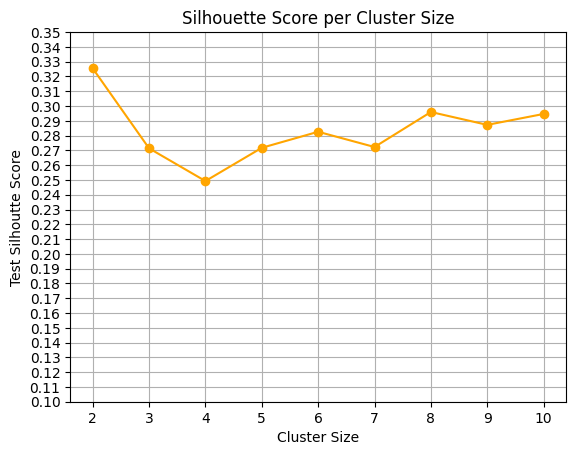

In [54]:

# Plot the silhoutte scores on a graph

plt.plot(cluster_size, ss, marker='o', linestyle='-', color='orange')

plt.title(f'Silhouette Score per Cluster Size')
plt.xlabel(f'Cluster Size')
plt.ylabel(f'Test Silhoutte Score')
plt.yticks(np.arange(0.10, 0.36, 0.01))

plt.grid(True)
plt.show()



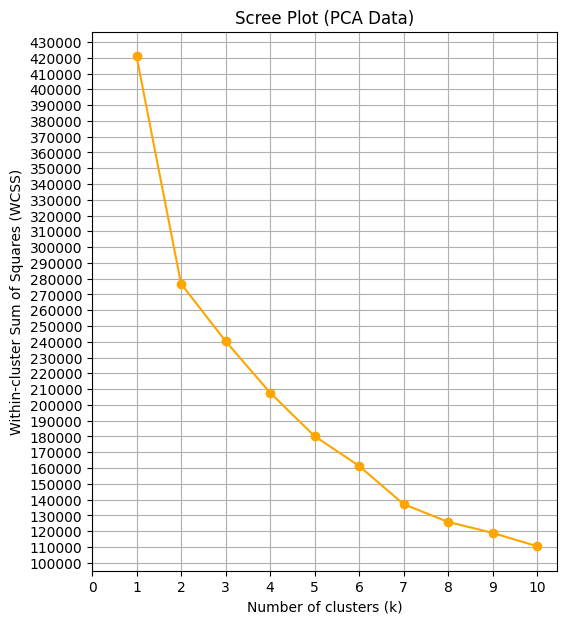

In [55]:
WCSS = []
cluster_size = [1,2,3,4,5,6,7,8,9,10]

# Fit clusters with eigen vectors
for i in cluster_size:
  model = KMeans(n_clusters = i)
  model = model.fit(eigen_vectors)
  WCSS.append(model.inertia_)

# plot the WCSS for each cluster
ax = plt.figure(figsize=(6,7)).gca()
plt.plot(cluster_size, WCSS, 'o-', color='orange')

plt.title(f'Scree Plot (PCA Data)')

plt.xticks(np.arange(0,11,1))
plt.xlabel('Number of clusters (k)')

plt.yticks(np.arange(100000, 440000, 10000))
plt.ylabel('Within-cluster Sum of Squares (WCSS)')

plt.grid()
plt.show()


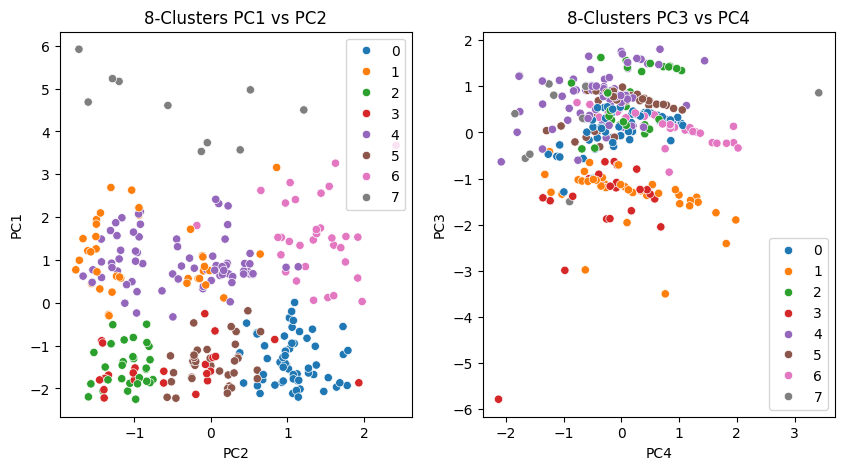

In [120]:
# Train test predict with the best sample
# Fit with pca_train
# Predict with pca_sample made from pca_test
model = KMeans(n_clusters=8)
model.fit(pca_train)
sampled_clusters = model.fit_predict(pca_sample)

# Visualize the data (PCA1 vs PC2)
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
sns.scatterplot(data = pca_sample, x='PC2', y='PC1', hue=sampled_clusters , palette='tab10')
plt.title(f'8-Clusters PC1 vs PC2')
plt.xlabel('PC2')
plt.ylabel('PC1')


plt.subplot(1,2,2)
sns.scatterplot(data = pca_sample, x='PC4', y='PC3', hue=sampled_clusters , palette='tab10')
plt.title(f'8-Clusters PC3 vs PC4')
plt.xlabel('PC4')
plt.ylabel('PC3')


plt.show()


### Hierarchical (PCA Dataset)

In [57]:
# Silhouette Score for PCA per Method & Cluster Size

cluster_size = [2,3,4,5,6,7,8,9,10]
methods = ['single','complete','average','ward']
sil_scores = [ [], [], [], [] ]

color = ['ro-', 'bo-', 'go-', 'yo-']
label = ['single', 'complete', 'average', 'yellow']

for i in range(len(methods)):
  for v in cluster_size:
    agg = AgglomerativeClustering(n_clusters=v, linkage=methods[i])
    agg_predict = agg.fit_predict(pca_sample)

    ss = silhouette_score(pca_sample, agg_predict)
    sil_scores[i].append(ss)



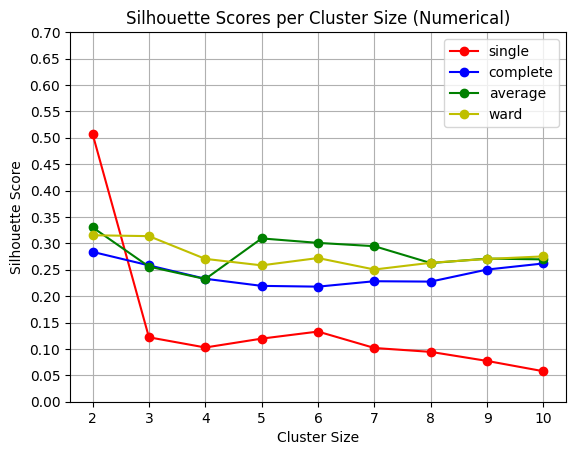

In [58]:
# Graph silhouette scores per method and cluster size

color = ['ro-', 'bo-', 'go-', 'yo-']
label = ['single', 'complete', 'average', 'ward']
cluster_size = [2,3,4,5,6,7,8,9,10]

for i in range(4):
  plt.plot(cluster_size, sil_scores[i], color[i], label=label[i])

plt.title(f'Silhouette Scores per Cluster Size (Numerical)')
plt.xlabel(f'Cluster Size')
plt.ylabel(f'Silhouette Score')

plt.xticks(np.arange(2,11,1))
plt.yticks(np.arange(0, 0.75, 0.05))

plt.grid(True)
plt.legend()
plt.show()


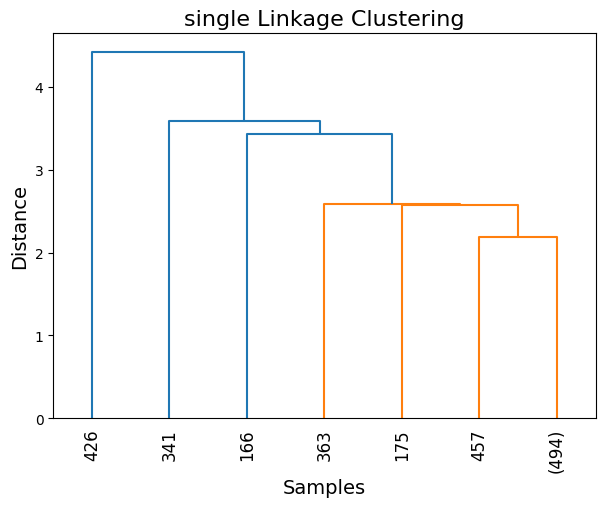

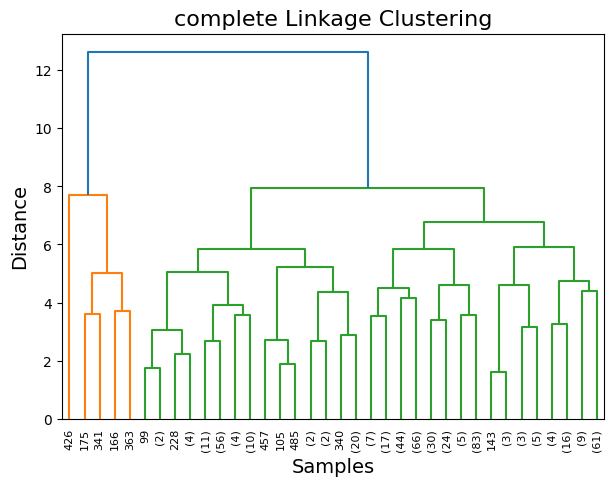

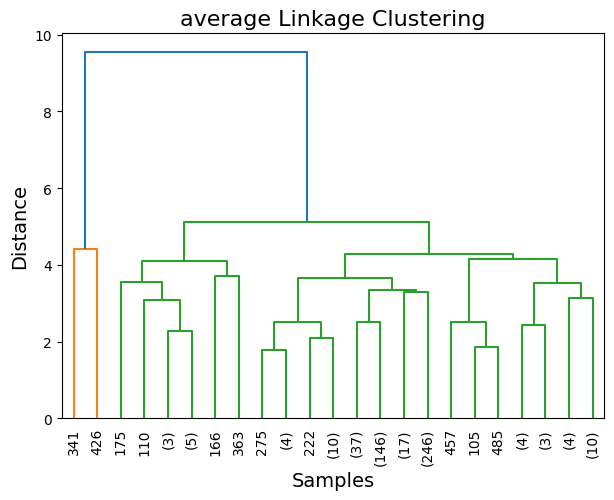

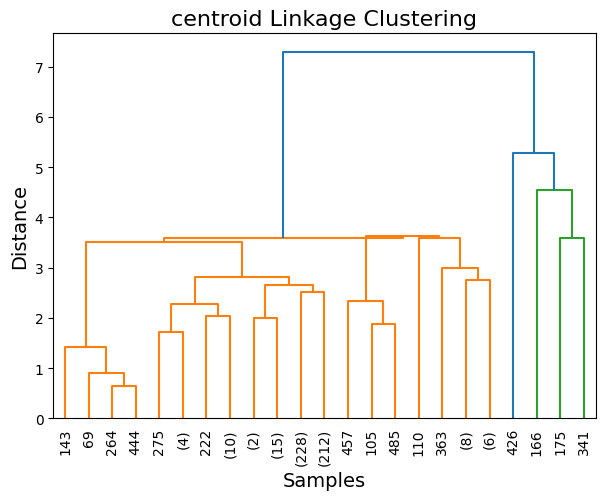

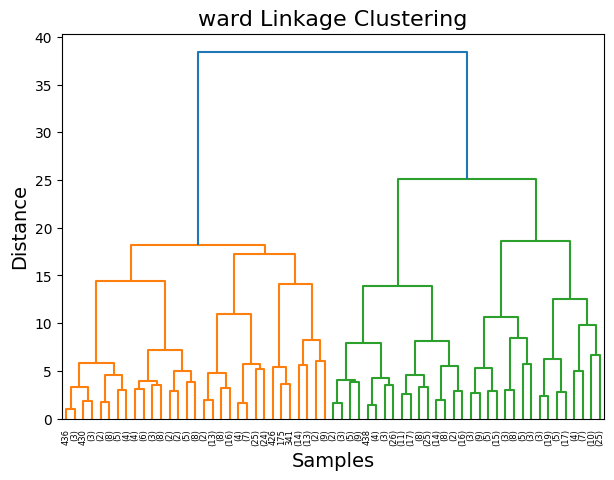

In [101]:

# ------------------------------------
#  Visualize Hierarchical Clustering
#        Numerical Variables
# ------------------------------------


linkage_methods = ['single','complete','average','centroid','ward']

for method in linkage_methods:
    # Define a clustering model with single linkage
    # Sample for 300 clusters
    linkage_cluster = linkage(sample_nums, method=method)

    # Create the dendrogram
    # Only 5 levels
    plt.figure(figsize=(7, 5))
    dendrogram(linkage_cluster, truncate_mode='level', p=5, leaf_rotation=90);

    #Plot the dendrgram
    plt.ylabel(f'Distance', fontsize=14)

    plt.xlabel('Samples', fontsize=14)

    plt.title(f'{method} Linkage Clustering', fontsize=16)
    plt.show()

